# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Sam Cuthbertson

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday December 1st**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

**Oh no, Stevey. We should be writing hypotheses about the value of our population mean ( $\mu$ ) not of our sample mean ( $\bar{x}$ ). You're looking for $H_0 \: : \: \mu = 30$**

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

**Stevey, you're adjacent to right - that'll be a great $H_1$. However, we want the null hypothesis to be what we're _not_ looking for, and we're looking to see if $\mu < 30$ is true. **

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

**Stevey, we're getting closer! Now you just need to use that test-statistic to compute a p-value! Until you do that, though, we can't compare to $\alpha$.**

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**Not quite, Stevey. Not quite. The conclusion you're looking for is "There is sufficient statistical evidence at the $\alpha = 0.03$ signifigance level that the mean age of customers is less than 30."**

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

**The most common misuse is apparently using p-values as a binary signal: either your results are signifigant, or they aren't. The suggestion to fix this misconception is to use p-values for what they are, and to read them as analog inputs. This allows much more in depth inference, and helps combat 'p-hacking' in order to get your p-values below an arbritrary threshold. **

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. Load this data into a Pandas DataFrame. 

In [2]:
dfPizza = pd.read_csv("data/pizza.csv")
dfPizza.info()
dfPizza.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 9 columns):
day            1266 non-null object
date           1266 non-null object
time           1266 non-null float64
operator       1266 non-null object
branch         1266 non-null object
driver         1266 non-null object
temperature    1266 non-null float64
bill           1266 non-null float64
pizzas         1266 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 89.1+ KB


,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

**Hey Stevey, what should our hypotheses be? Oh, the ones you had above? Perfect. **

$$
\begin{align}
    H_0 &:& \mu &= 30 \\
    H_1 &:& \mu &< 30 
\end{align}
$$

** Additionally, since we have far more than 30 data points, the central limit theorum applies and we are safe assuming that data approximates the normal distribution. With all that in mind, we can calculate a p-value with the following: **

In [3]:
z = (np.mean(dfPizza["time"]) - 30) / (np.std(dfPizza["time"])/np.sqrt(len(dfPizza["time"])))
p = stats.norm.cdf(z)
print("p-value:", p)

p-value: 0.000755764448788


**As $0.0007 < 0.05$, there is statistically signifigant evidence at the $\alpha = 0.05$ level that average delivery time across all branches is less than 30 minutes.**

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

**Using similar logic to above:**

In [4]:
z = (65 - np.mean(dfPizza["temperature"])) / (np.std(dfPizza["temperature"])/np.sqrt(len(dfPizza["temperature"])))
p = stats.norm.cdf(z)
print("p-value:", p)

p-value: 0.0833884332991


**As $0.08 \not\leq 0.05$, there is not statistically signifigant evidence at the $\alpha = 0.05$ level that average temperature at delivery time across all branches is greater than 65F.**

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

**In order to determine if one driver is statistically signifigantly better than the other in the given metrics, we will perform two hypothesis tests: one on the diffrence of tempatures, and one on the diffrence of delivery times. Our hypotheses are as follows: **

**Temperature Test:**
$$
\begin{align*}
    H_0 &:& temp_m - temp_l &= 0 \\
    H_1 &:& temp_m - temp_l &\neq 0
\end{align*}
$$

**Time Test:**
$$
\begin{align*}
    H_0 &:& time_m - time_l &= 0 \\
    H_1 &:& time_m - time_l &\neq 0
\end{align*}
$$

In [5]:
dfMario = dfPizza.loc[dfPizza['driver'] == 'Mario']
dfLuigi = dfPizza.loc[dfPizza['driver'] == 'Luigi']

m_avg_t = np.mean(dfMario['temperature'])
l_avg_t = np.mean(dfLuigi['temperature'])
m_std_t = np.std(dfMario['temperature'])
l_std_t = np.std(dfLuigi['temperature'])
m_len_t = len(dfMario['temperature'])
l_len_t = len(dfLuigi['temperature'])

z1 = (m_avg_t - l_avg_t) / np.sqrt((m_std_t**2 / m_len_t) + (l_std_t**2 / l_len_t))
pval = 2*min(stats.norm.cdf(z1), 1-stats.norm.cdf(z1))
print("Avg Temperature p-value:", pval)

m_avg_ti = np.mean(dfMario['time'])
l_avg_ti = np.mean(dfLuigi['time'])
m_std_ti = np.std(dfMario['time'])
l_std_ti = np.std(dfLuigi['time'])
m_len_ti = len(dfMario['time'])
l_len_ti = len(dfLuigi['time'])

z2 = (m_avg_ti - l_avg_ti) / np.sqrt((m_std_ti**2 / m_len_ti) + (l_std_ti**2 / l_len_ti))
pval = 2*min(stats.norm.cdf(z2), 1-stats.norm.cdf(z2))
print("Avg Time p-value:", pval)

Avg Temperature p-value: 0.337376560743
Avg Time p-value: 0.996506274376


**As neither p-value is below 0.05, neither driver is statistically signifigantly better than the other at any of the given metrics at the $\alpha = 0.05$ signifigance level.**

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

In [6]:
dfSalvatore = dfPizza.loc[dfPizza["driver"] == "Salvatore"]
proportion = np.sum(dfSalvatore["time"] > 40) / len(dfSalvatore["time"])

z = (proportion - 0.05) / np.sqrt( (0.05)*(1-0.05) / np.sum(dfSalvatore["time"]))
pval = stats.norm.cdf(z)
print("Time Greater than 40 p-value:", pval)

Time Greater than 40 p-value: 0.992531594507


### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

In [7]:
tdiff = stats.t.ppf(0.05/2, 11) * (3.2 / np.sqrt(12))
CI = [15.5 + tdiff, 15.5 - tdiff]
print(CI)

[13.46681700054998, 17.53318299945002]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.5$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

**This is very similar to the pizza delivery problem above, with hypotheses as follows:**

$$
\begin{align*}
    H_0 &:& nap\_{score} - coffee\_{score} &= 0 \\
    H_1 &:& nap\_{score} - coffee\_{score} &> 0
\end{align*}
$$

In [8]:
z = (15.5 - 12.25) / np.sqrt((3.2**2 / 12) + (3.1**2 / 12))
pval = 1-stats.t.cdf(z, 11)
print("Score Difference p-value:", pval)

Score Difference p-value: 0.0140632360114


**Napping is evidently better at the $\alpha = 0.5$ level.**

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

In [9]:
tdiff = stats.t.ppf(0.05/2, 11) * (3.1 / np.sqrt(12))
CI = [12.25 + tdiff, 12.25 - tdiff]
print(CI)

[10.280353969282793, 14.219646030717207]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [10]:
dfEmails = pd.read_csv("data/email.csv")
dfEmails.info()
dfEmails.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
Group      124 non-null int64
Date       63 non-null object
Sent       124 non-null int64
Clicked    124 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.0+ KB


,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

**Let $\mu$ be Jonny's CTR from his tests.**
$$
\begin{align*}
    H_0 &:& \mu &= 0.05 \\
    H_1 &:& \mu &> 0.05
\end{align*}
$$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [18]:
def p_ctr_compute(df):
    j_ctr = np.sum(df['Clicked']) / np.sum(df['Sent'])

    z = (j_ctr - 0.05) / np.sqrt((0.05 * (1 - 0.05)) / np.sum(df['Sent']))
    pval = 1-stats.norm.cdf(z)
    print("Score Difference p-value:", pval)
    
p_ctr_compute(dfEmails)

Score Difference p-value: 0.224365747475


**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

**Since Johnny is likely getting fairly desperate at this point, I'd imagine he'd attempt something like dropping all data points where Clicked = 0. Let's see if that works for him:**

In [21]:
p_ctr_compute(dfEmails.loc[dfEmails["Clicked"] != 0])

Score Difference p-value: 0.0336489140453


**Woah! A subset that with a high enough proportion! Jonny's might be able to claim that this eliminates fake/old/no-reply email addresses from consideration, but he has a hard sell ahead of him. **

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [25]:
dfAuto = pd.read_csv('data/auto.csv')
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfAuto["horsepower"], dfAuto["mpg"])
print("Y = {0:3f} + {1:3f}x".format(intercept, slope))

Y = 39.935861 + -0.157845x


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


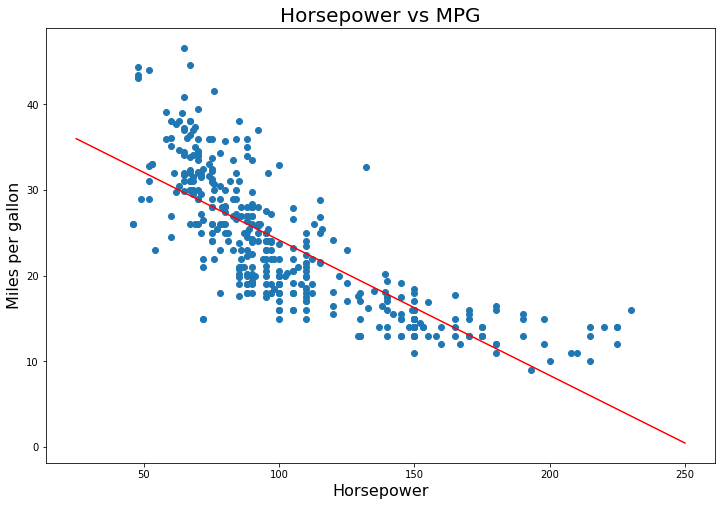

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

x = np.linspace(25,250,100) 
y = intercept + slope * x

ax.set_title("Horsepower vs MPG", fontsize=20)
ax.set_xlabel("Horsepower", fontsize=16)
ax.set_ylabel("Miles per gallon", fontsize=16);
ax.scatter(dfAuto["horsepower"], dfAuto["mpg"])
ax.plot(x, y, color="red")

plt.show()

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

**Negative, as the slope is negative.**

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

In [45]:
tv = stats.t.ppf(0.975, len(dfAuto["horsepower"]) - 2)
CI = [slope - tv * std_err, slope + tv * std_err]
print(CI)

[-0.17051700846435688, -0.14517245824295019]


**As 0 is nowhere in this convidence interval, we can state that there is a real relationship between horsepower and mpg.**

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

**We'll use the same hypotheses as stats.linregress:**

$$
\begin{align*}
    H_0 &:& \beta &= 0 \\
    H_1 &:& \beta &\neq 0
\end{align*}
$$

In [47]:
print(p_value)

7.0319890294e-81


**As we can see, this is incredibly low. We can state that a a signifigance level of at _least_ $\alpha = 0.05$, there is a real relationship between horsepower and miles per gallon.**

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [48]:
intercept + slope * 97

24.624921885866058